In [55]:
# Joni McCawley
# ML – HW#3
# Filename: 
# Due: 
#
# Objective:
# 
#Importing all required libraries
from sklearn import datasets
import numpy as np
# Importing all required libraries
from sklearn import datasets
import numpy as np
import pandas as pd  # Add pandas library for reading CSV
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC  # Correct import statement
from sklearn.linear_model import Perceptron
import os
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from matplotlib.colors import ListedColormap

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Set the path of each of the folders we want to excract from

Corridor_rm155_71_loc0000_path = r"C:/Users/jonim/OneDrive/Classwork/2+4+ghz+indoor+channel+measurements/Measurements_Upload/Measurements_Upload/Corridor_rm155_7.1/Loc_0000"
Lab139_71_loc0000_path = r"C:/Users/jonim/OneDrive/Classwork/2+4+ghz+indoor+channel+measurements/Measurements_Upload/Measurements_Upload/Lab139_7.1/Loc_0000"
Main_Lobby71_loc0000_path = r"C:/Users/jonim/OneDrive/Classwork/2+4+ghz+indoor+channel+measurements/Measurements_Upload/Measurements_Upload/Main_Lobby_7.1/Loc_0000"
Sport_Hall_71_loc0000_path = r"C:/Users/jonim/OneDrive/Classwork/2+4+ghz+indoor+channel+measurements/Measurements_Upload/Measurements_Upload/Sport_Hall_7.1/Loc_0000"

def extract_label(file_name):
    if 'Corridor_rm155_71_loc0000_path' in file_name:
        return 'Corridor'
    elif 'Lab139_71_loc0000_path' in file_name:
        return 'Lab'
    elif 'Main_Lobby71_loc0000_path' in file_name:
        return 'Main Lobby'
    elif 'Sport_Hall_71_loc0000_path' in file_name:
        return "Sport Hall"
    else:
        return None
    
combined_data_sport = pd.DataFrame()

for filename in os.listdir(Sport_Hall_71_loc0000_path):
    if filename.endswith(".csv"):
        file_path = os.path.join(Sport_Hall_71_loc0000_path, filename)
        data = pd.read_csv(file_path)
        # Split the values in the existing column by semicolons into new columns
        data = data['# Version 1.00'].str.split(';', expand=True)
        data = data.drop([0,1])
        combined_data_sport = pd.concat([combined_data_sport, data], ignore_index=True)

combined_data_sport.to_csv("combined_data_corridor.csv", index=False)

combined_data_corridor = pd.DataFrame()

for filename in os.listdir(Corridor_rm155_71_loc0000_path):
    if filename.endswith(".csv"):
        file_path = os.path.join(Corridor_rm155_71_loc0000_path, filename)
        data = pd.read_csv(file_path)
        # Split the values in the existing column by semicolons into new columns
        data = data['# Version 1.00'].str.split(';', expand=True)
        data = data.drop([0,1])
        combined_data_corridor = pd.concat([combined_data_corridor, data], ignore_index=True)

combined_data_corridor.to_csv("combined_data_corridor.csv", index=False)

combined_data_lab1 = pd.DataFrame()

for filename in os.listdir(Lab139_71_loc0000_path):
    if filename.endswith(".csv"):
        file_path = os.path.join(Lab139_71_loc0000_path, filename)
        data = pd.read_csv(file_path)
        data = data['# Version 1.00'].str.split(';', expand=True)
        data = data.drop([0,1])
        combined_data_lab1 = pd.concat([combined_data_lab1, data], ignore_index=True)

combined_data_lab1.to_csv("data_lab.csv", index=False)

combined_data_main_lobby = pd.DataFrame()

for filename in os.listdir(Main_Lobby71_loc0000_path):
    if filename.endswith(".csv"):
        file_path = os.path.join(Main_Lobby71_loc0000_path, filename)
        data = pd.read_csv(file_path)
        data = data['# Version 1.00'].str.split(';', expand=True)
        data = data.drop([0,1])
        combined_data_main_lobby = pd.concat([combined_data_main_lobby, data], ignore_index=True)

combined_data_main_lobby.to_csv("combined_data_corridor.csv", index=False)

combined_data_sport['label'] = "Sport"
combined_data_corridor['label'] = "Corridor"
combined_data_main_lobby['label'] = "Lobby"
combined_data_lab1['label'] = "lab"

data_frames = [combined_data_sport, combined_data_corridor, combined_data_main_lobby, combined_data_lab1]

combined_data = pd.concat(data_frames, ignore_index=True)

combined_data.to_csv("combined_data_all.csv", index=False)

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Handling missing values by dropping rows with missing values
combined_data.dropna(inplace=True)


# Encode labels using LabelEncoder
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
combined_data['label_encoded'] = label_encoder.fit_transform(combined_data['label'])

# Split the data into features (X) and labels (y_encoded)
X = combined_data.drop(columns=['label', 'label_encoded'])
y_encoded = combined_data['label_encoded']


# Convert empty strings to NaN
X[X == ''] = np.nan

# Convert the entire array to float
X = X.astype(float)

X = X.iloc[:, :-1]  # Remove the last column


In [56]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

# Create a pipeline
pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('reduce_dim', PCA()),  # You can change this to LDA or other dimensionality reduction techniques
    ('classifier', LogisticRegression())
])

# Define a parameter grid for grid search
param_grid = {
    'reduce_dim__n_components': [2, 3, 4],  # Number of components for PCA
    'classifier__C': [0.01, 0.1, 1.0, 10.0, 100.0],  # Regularization parameter for Logistic Regression
}

# Create a grid search object with cross-validation
grid = GridSearchCV(pipe, param_grid=param_grid, cv=5)  # You can adjust the number of cross-validation folds

# Fit the grid search to the training data
grid.fit(X_train, y_train)

# Get the best model from grid search
best_model = grid.best_estimator_

# Make predictions on the test data
y_pred = best_model.predict(X_test)

# Calculate and print the accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Print the best hyperparameters found by grid search
best_params = grid.best_params_
print("Best Hyperparameters:")
for param, value in best_params.items():
    print(f"{param}: {value}")

Accuracy: 0.27
Best Hyperparameters:
classifier__C: 0.01
reduce_dim__n_components: 4


In [83]:
import matplotlib.pyplot as plt
def plot_decision_regions(X,y,classifier,test_idx=test_idx,resolution=0.02):
    markers = ('s','x','o')
    colors = ('red', 'blue', 'lightgreen')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # Plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    #Plot all the samples
    X_test,y_test=X[test_idx,:],y[test_idx]
    for idx,cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y==cl,0],y=X[y==cl,1],alpha=0.8,c=cmap(idx),marker=markers[idx],label=cl)

    #Highlight test samples
    if test_idx:
        X_test, y_test =X[test_idx,:],y[test_idx]

    plt.scatter(X_test[:,0],X_test[:,1],facecolors='none', edgecolors='black', alpha=1.0, linewidths=1, marker='o', s=55, label='test set')

In [84]:
X_combined_std=np.vstack((X_train,X_test))
y_combined=np.hstack((y_train,y_test))
plot_decision_regions(X=X_combined_std, y=y_combined, classifier=best_model, test_idx=range(y_train.size, y_train.size + y_test.size))

MemoryError: Unable to allocate 4.37 TiB for an array with shape (120, 5000000100) and data type float64

In [57]:
# import matplotlib.pyplot as plt
# # Create a scatter plot to visualize the classification outcome
# plt.figure(figsize=(8, 6))
# plt.scatter(X_test[:, 0], X_test[:, 1], c=y_pred, cmap='viridis', s=50)
# plt.title('Classification Outcome of the Best Model')
# plt.xlabel('Feature 1')
# plt.ylabel('Feature 2')
# plt.colorbar(label='Class')
# plt.show()

In [58]:
# Calculate metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

# Get the best hyperparameters found by grid search
best_params = grid.best_params_

# Print the results to a text file
with open('model_evaluation.txt', 'w') as file:
    file.write("Best Hyperparameters:\n")
    for param, value in best_params.items():
        file.write(f"{param}: {value}\n")
    file.write(f"Training Accuracy: {grid.best_score_:.2f}\n")
    file.write(f"Test Accuracy: {accuracy:.2f}\n")
    file.write(f"Precision: {precision:.2f}\n")
    file.write(f"Recall: {recall:.2f}\n")
    file.write(f"F1 Score: {f1:.2f}\n")

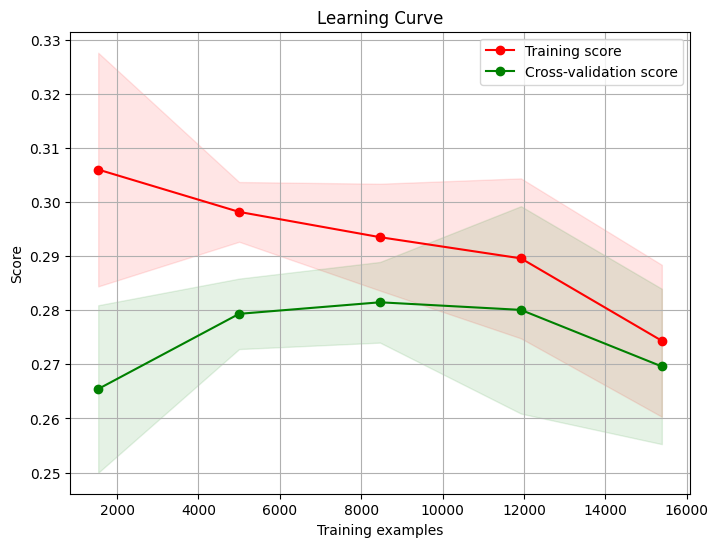

In [59]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score, auc
from sklearn.model_selection import learning_curve

# Create and save learning curves
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5)):
    plt.figure(figsize=(8, 6))
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    plt.savefig('learning_curve.png')
    plt.show()
    plt.close()

plot_learning_curve(best_model, "Learning Curve", X_train, y_train, cv=5)



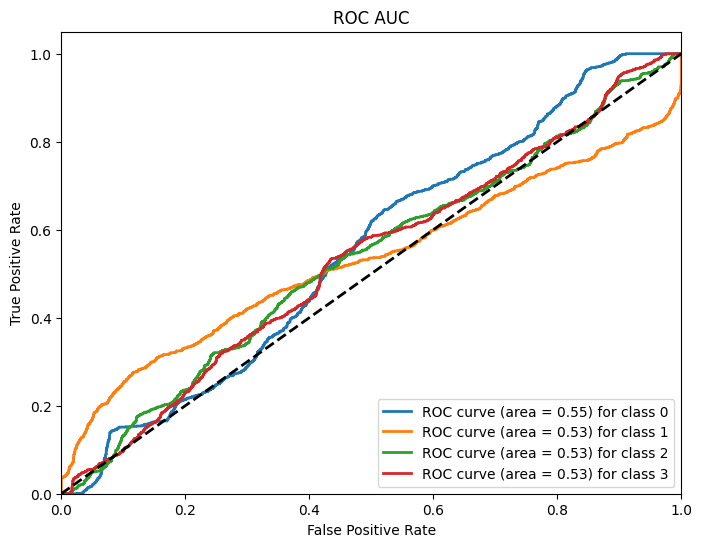

In [60]:

# Create and save ROC AUC graph
y_prob = best_model.predict_proba(X_test)
n_classes = len(np.unique(y_test))
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(np.array(pd.get_dummies(y_test))[:, i], y_prob[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

plt.figure(figsize=(8, 6))
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], lw=2,
             label='ROC curve (area = %0.2f) for class %d' % (roc_auc[i], i))

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC AUC')
plt.legend(loc="lower right")
plt.savefig('roc_auc.png')
plt.show()
plt.close()


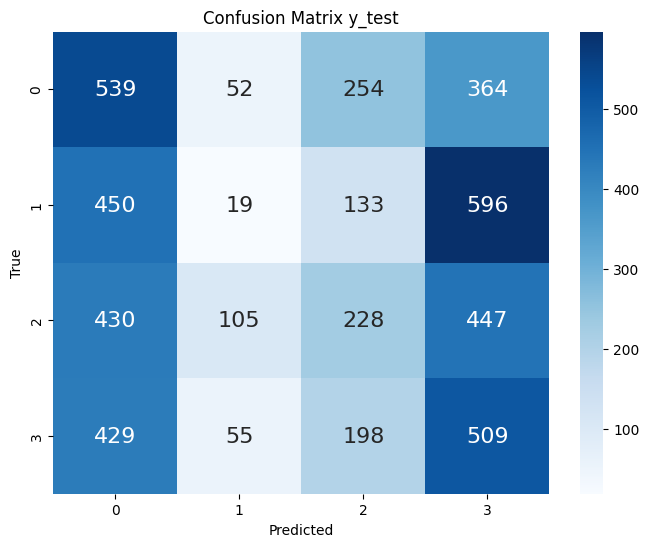

In [61]:
# CONFUSION MATRIX FOR Y_TEST
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
confusion_test = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(confusion_test, annot=True, fmt="d", cmap="Blues", annot_kws={"size": 16})
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix y_test")
plt.show()


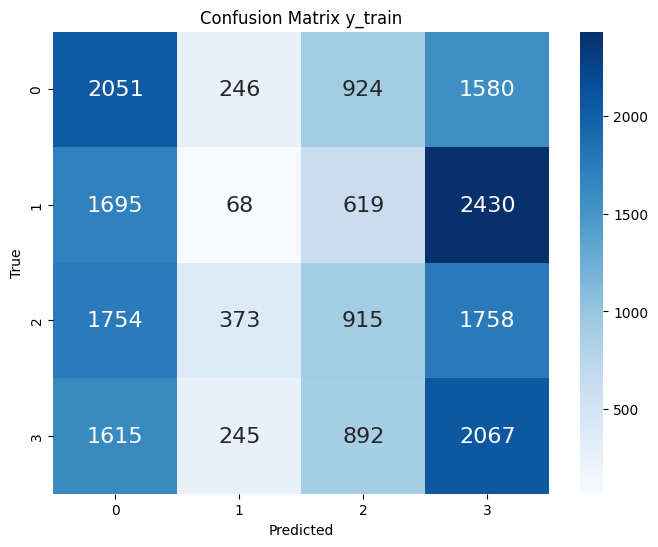

In [62]:
# Make predictions on the training data
y_train_pred = best_model.predict(X_train)

# Create a confusion matrix for y_train
confusion_train = confusion_matrix(y_train, y_train_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(confusion_train, annot=True, fmt="d", cmap="Blues", annot_kws={"size": 16})
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix y_train")
plt.show()

In [63]:

# # Split the transformed data into training and testing sets
# X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)
# X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

# # PIPELINE

# pipe = Pipeline([
#     ('scaler', StandardScaler()),
#     ('reduce_dim', PCA()),  # You can change this to LDA
#     ('classifier', LogisticRegression())
# ])

# #This will evoke the pipeline
# pipe.fit(X_train, y_train)
# y_pred = pipe.predict(X_test)
# print('Test Accuracy: %.3f' % pipe.score(X_test, y_test))

# # GRID SEARCH

# param_grid = {
#     'reduce_dim__n_components': [2, 4, 6],  # Number of components for PCA or LDA
#     'classifier__C': [0.1, 1.0, 10.0],   # Regularization parameter for Logistic Regression
# }

# grid = GridSearchCV(pipe, param_grid=param_grid, cv=5)  # You can adjust the number of cross-validation folds
# grid.fit(X_train, y_train)  # X_train and y_train are your training data

# best_model = grid.best_estimator_
# test_accuracy = best_model.score(X_test, y_test)  # X_test and y_test are your test data

# best_params = grid.best_params_
# # CROSS VALIDATION
# from sklearn.model_selection import cross_val_score
# scores = cross_val_score(estimator=pipe, X=X_train,y=y_train,cv=10, n_jobs=-1) #use all available cores in the machine
# print('CV accuracy scores: %s' % scores)
# print('CV accuracy: %.3f +/- %.3f' % (np.mean(scores), np.std(scores)))
# from sklearn.linear_model import LogisticRegression
# from sklearn.model_selection import train_test_split
# from sklearn.preprocessing import StandardScaler

# # Create a logistic regression model
# logistic_regression_model = LogisticRegression(random_state=42)

# # Train the model on the training data
# logistic_regression_model.fit(X_train, y_train)

# # Make predictions on the test data
# y_pred = logistic_regression_model.predict(X_test)

# from sklearn.metrics import accuracy_score

# # Calculate the accuracy on the test data
# accuracy = accuracy_score(y_test, y_pred)

# # Print the accuracy
# print(f"Accuracy: {accuracy:.2f}")
